In [ ]:
import sys
sys.path.append('..')  # Adjust path to import raincloudpy
sys.path.append('.')


p:\CodeProjects\Current\python-packages\raincloudpy\examples\..\raincloudpy\raincloud.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Basic raincloud plot created successfully!


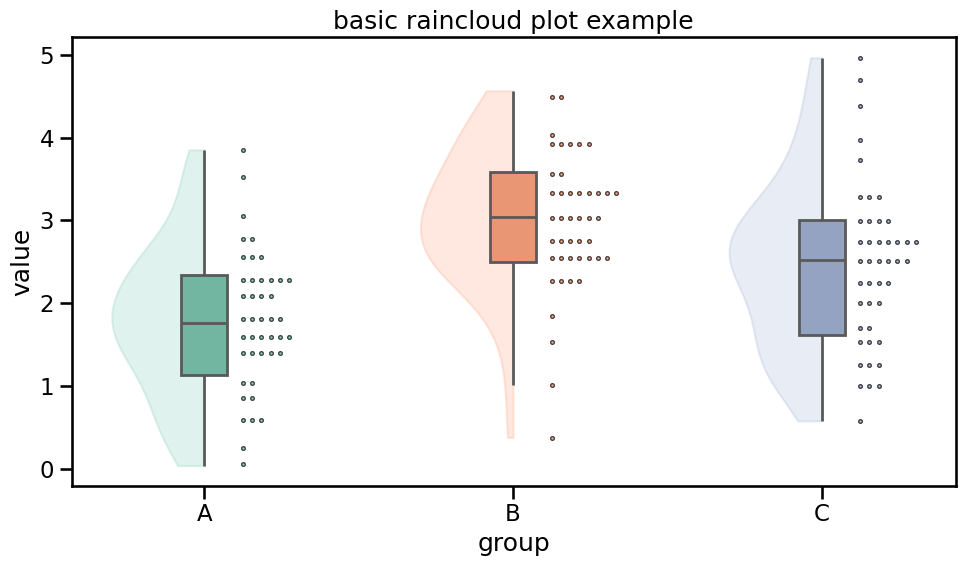

In [10]:
"""
Basic example of creating a raincloud plot.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from raincloudpy import raincloudplot
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
df = pd.DataFrame({
    'group': ['A'] * 50 + ['B'] * 50 + ['C'] * 50,
    'value': np.concatenate([
        np.random.randn(50) + 2,
        np.random.randn(50) + 3,
        np.random.randn(50) + 2.5
    ])
})

# Create raincloud plot
# fig, ax = plt.subplots(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.set_context('talk')
raincloudplot(data=df, x='group', y='value', palette='Set2')
plt.title('basic raincloud plot example')
plt.ylabel('value')
plt.xlabel('group')
plt.tight_layout()


print("Basic raincloud plot created successfully!")


p:\CodeProjects\Current\python-packages\raincloudpy\examples\..\raincloudpy\raincloud.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


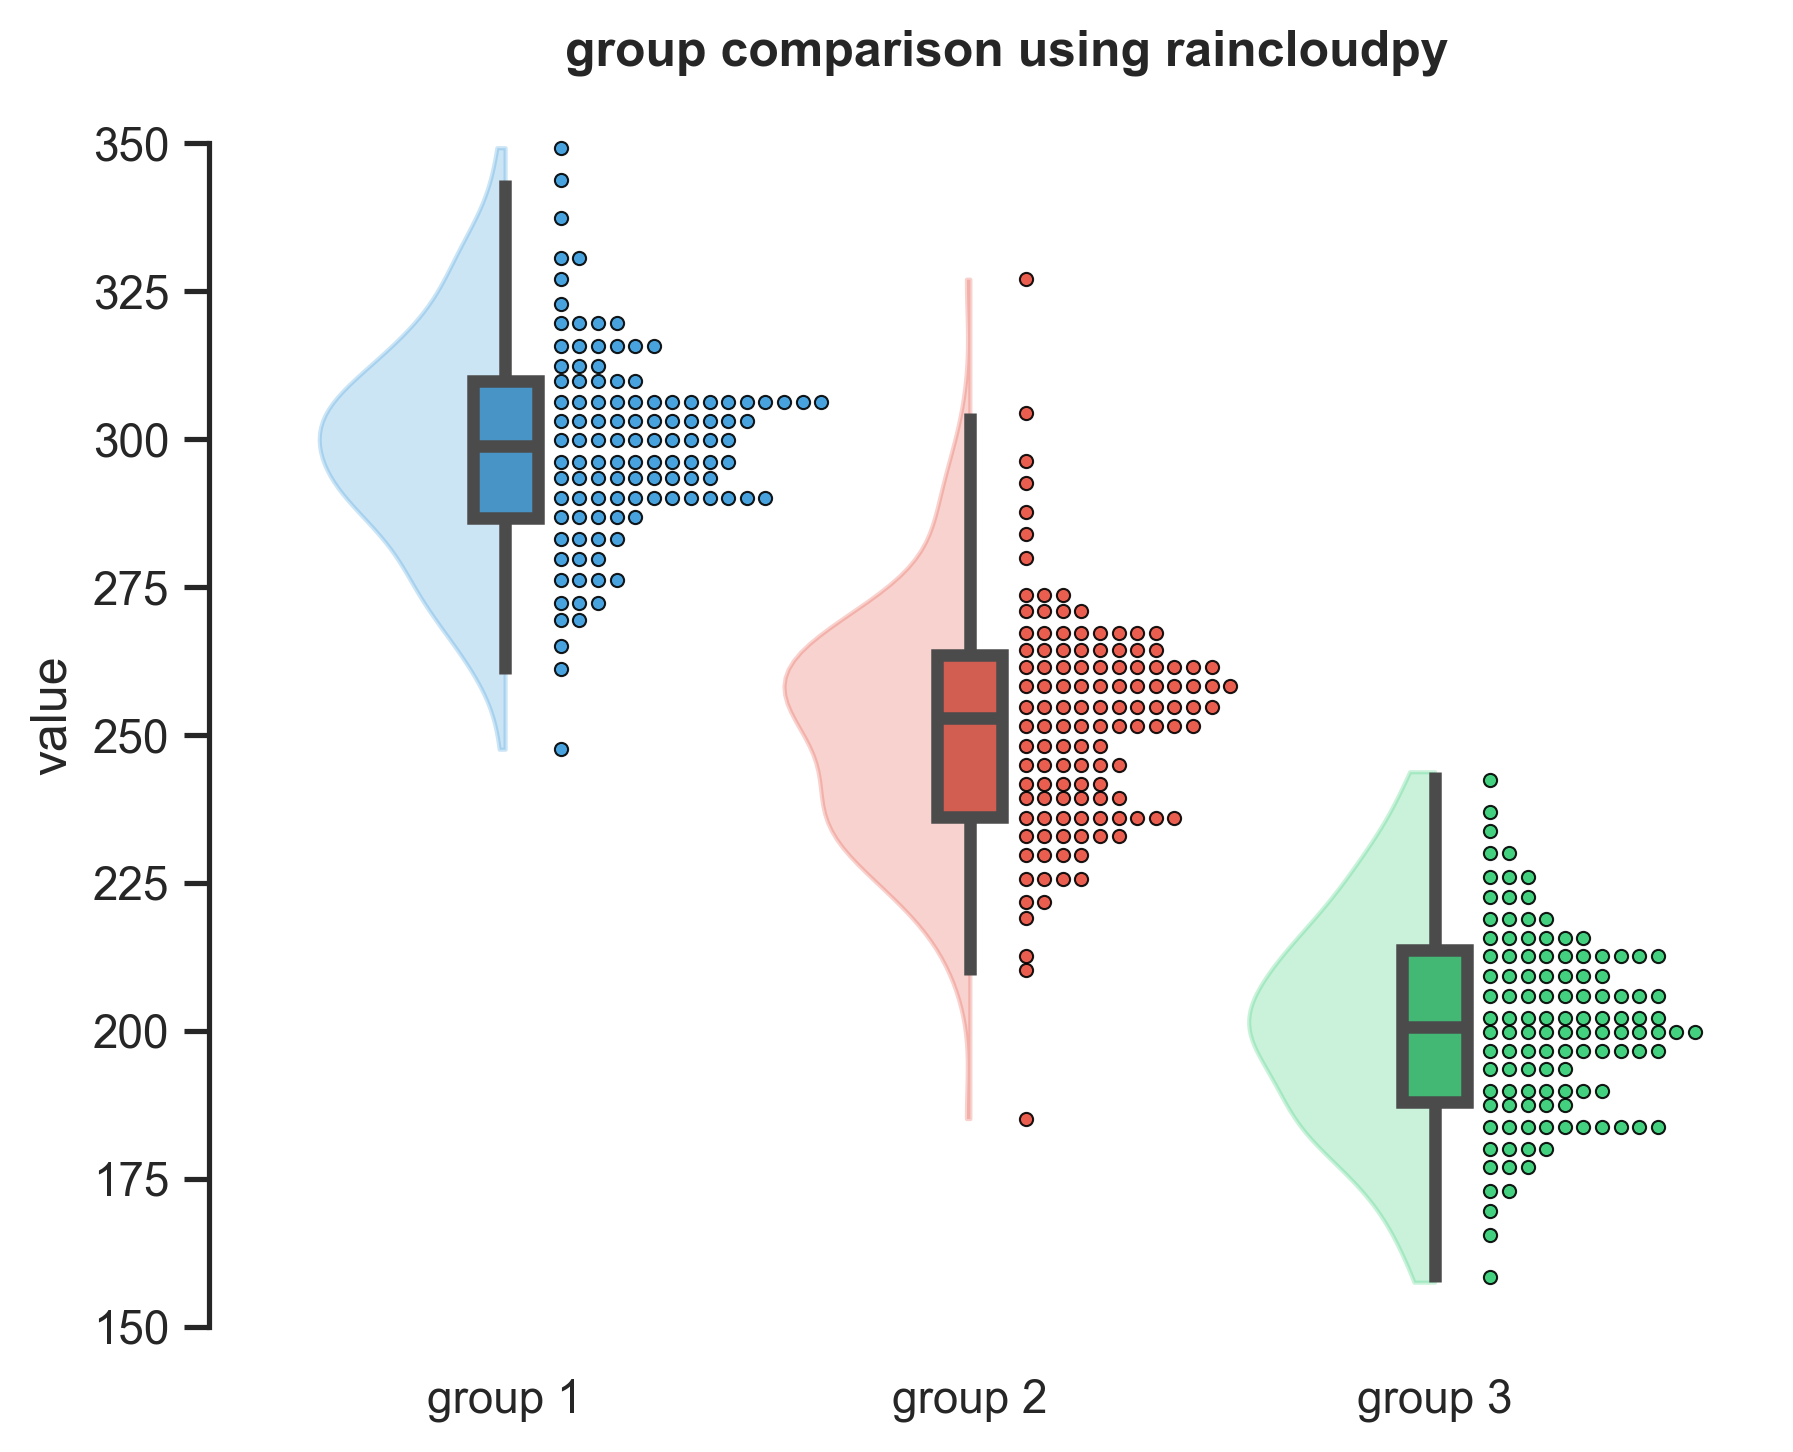

In [28]:
"""
Advanced example with customized raincloud plot.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data mimicking value comparison
N = 150
df_fit = pd.DataFrame({
    'group': ['group 1'] * N + ['group 2'] * N + ['group 3'] * N,
    'value': np.concatenate([
        np.random.normal(loc=300, scale=20, size=N),
        np.random.normal(loc=250, scale=20, size=N),
        np.random.normal(loc=200, scale=20, size=N)
    ])
})




sns.set_style("ticks")
sns.set_context("notebook")

# Create customized raincloud plot
plt.figure(figsize=(6, 5), dpi=300)
raincloudplot(
    data=df_fit, 
    x='group', 
    y='value',
    order=['group 1', 'group 2', 'group 3'],
    palette=['#3498db', '#e74c3c', '#2ecc71'],
    box_width=0.14,
    violin_width=0.4,
    dot_size=10,
    dot_spacing=0.04,
    y_threshold=3,
    box_kwargs={'linewidth': 3},
    scatter_kwargs={'alpha': 0.9, 'edgecolor': 'black', 'linewidth': 0.5},
    violin_kwargs={'alpha': 0.25},
)


plt.title('group comparison using raincloudpy', fontweight='bold')
plt.ylabel('value')
plt.xlabel('')
plt.tight_layout()
sns.despine(offset=10, trim=True, bottom=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False)

